In [1]:
# import relevant modules 
import os
import sys
from importlib import reload
import numpy as np

# locate directory containing scripts 
current_directory = os.getcwd() 
src_directory = os.path.dirname(current_directory) + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain, generate_VTA_list, VTA_numerics, VTA_analytics
from simulate_algorithm import format_number
reload(spin_chain)
reload(generate_VTA_list)
reload(VTA_numerics)
reload(VTA_analytics);

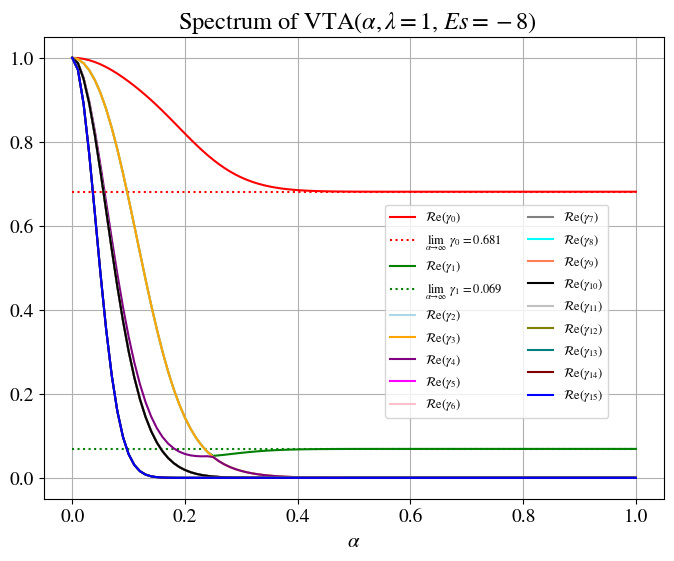

In [7]:
# specify parameters for VTA_exact
N_qubits = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True

M = 4
α_start = 0 
α_end = 1
α_steps = 101

Es_start = -8
Es_end = -8
Es_gradation = 1

k_start = 0
k_end = 15
k_steps = 1

tolerance = 1e-9
asymptotes = True

VTA_type = 'approximate'
log = False
ranking = 'energy'

fontsize = 9
ncol = 2
loc = (0.55, 0.175)
savefile = True
return_op_list = True

VTA_list = VTA_numerics.sweep_spectra( 
                    N_qubits, Jx, Jy, Jz, periodic_bc, \
                    M, α_start, α_end, α_steps, \
                    Es_start, Es_end, Es_gradation, \
                    k_start, k_end, k_steps, \
                    tolerance, asymptotes, current_directory, \
                    VTA_type = VTA_type, log = log, \
                    fontsize = fontsize, ncol = ncol, loc = loc, \
                    savefile = savefile, return_op_list = return_op_list)

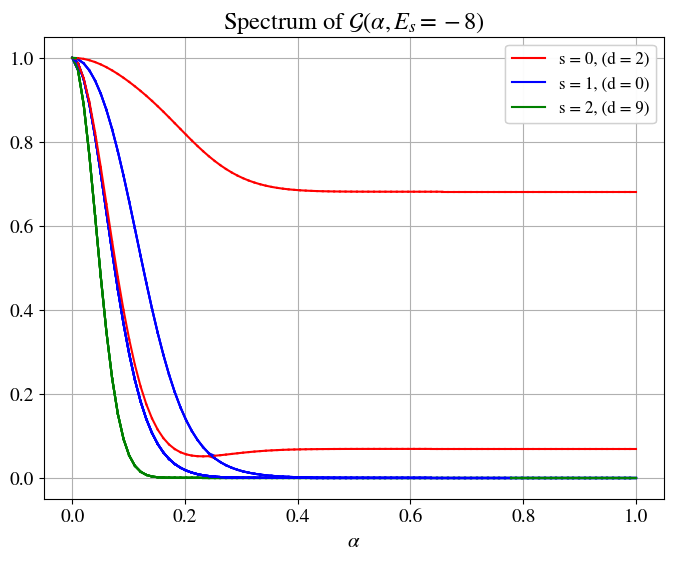

In [11]:
VTA_type = 'approximate'
log = False
ranking = 'spin'

α_start = 0
α_end = 1
α_steps = 100

Es_start = -8
Es_end = -8
Es_gradation = 1

k_start = 0
k_end = 15
k_steps = 1

Δ = 0
r = 1

loc = None # 'best' #(0.575, 0.55)
loc_spin = 'best' # 'upper right'# (0.75, 0.5)

asymptotes = True
ncol = 4
fontsize = 12
savefile = True

G_list = VTA_analytics.sweep_spectra(
            VTA_type, log, N_qubits, Jx, Jy, Jz, periodic_bc, \
            α_start, α_end, α_steps, \
            Es_start, Es_end, Es_gradation, \
            ranking, k_start, k_end, k_steps, asymptotes, \
            tolerance, current_directory, Δ = Δ, r = r, fontsize = fontsize, \
            ncol = ncol, loc = loc, loc_spin = loc_spin, \
            return_op_list = return_op_list, savefile = savefile)

In [39]:
from qutip import Qobj

In [43]:
ψ = Qobj(rand_ket([2]*4))
ψ

Quantum object: dims=[[2, 2, 2, 2], [1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.05278627-0.22880503j]
 [ 0.01706471-0.16757159j]
 [-0.021346  +0.00426451j]
 [ 0.13541936-0.13767422j]
 [ 0.21705606+0.09148063j]
 [-0.05554313+0.06288628j]
 [-0.3702293 +0.04075678j]
 [ 0.04760117+0.36513071j]
 [-0.07214525+0.2964545j ]
 [ 0.00240655+0.07610764j]
 [-0.09745523+0.30565726j]
 [-0.38893025+0.17899184j]
 [-0.18409961-0.00233838j]
 [ 0.01423706+0.27688223j]
 [-0.01850708+0.06074161j]
 [ 0.04546038-0.1997616j ]]

In [44]:
eigvecs = G_list[56].eigenstates()[1]

In [53]:
ci_list = []
for v in eigvecs: 
    ci = v.dag()*ψ
    ci_list.append(ci)

In [56]:
sum(ci*v for ci, v in zip(ci_list, eigvecs))

Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[-0.07252028-0.28161683j]
 [ 0.01706471-0.16757159j]
 [-0.021346  +0.00426451j]
 [ 0.13541936-0.13767422j]
 [ 0.18658253+0.22356986j]
 [-0.05554313+0.06288628j]
 [-0.3702293 +0.04075678j]
 [ 0.04760117+0.36513071j]
 [-0.07214525+0.2964545j ]
 [ 0.00240655+0.07610764j]
 [-0.09745523+0.30565726j]
 [-0.38893025+0.17899184j]
 [-0.18409961-0.00233838j]
 [ 0.01423706+0.27688223j]
 [-0.01850708+0.06074161j]
 [ 0.04546038-0.1997616j ]]

In [ ]:
from spin_chain import symmetry_eigvecs
import matplotlib.pyplot as plt
from qutip import expect
from collections import Counter

In [ ]:
def sort_eigvals(ranking, eigvals, k_start, k_end, k_steps): 
    
    '''
    returns eigenvalues depending on method of ranking
    '''
    
    if ranking == 'energy' or ranking == 'spin': 
        
        return eigvals
    
    elif ranking == 'modulus': 
        
        # define key that sorts according to modulus 
        key = lambda x: abs(x)
        
        return np.array(sorted(eigvals, reverse = True, key=key) \
                        [k_start:k_end + 1: k_steps])
def find_s(γ, tolerance = 1e-9):

    '''
    function that will find s eigval from 
    total angular momentum eigenvalue γ = s(s+1)
    '''

    # compute s and round to nearest integer
    s = (-1 + np.sqrt(1 + 4*γ))/2
    int_s = np.round(s, decimals = abs(np.log10(tolerance)).astype(int))

    # return s if its is sufficiently close to an integer
    if np.all(abs(s - int_s)) < tolerance: 
        return int_s
    else: 
        raise ValueError('s is not an integer')

In [ ]:
N = N_qubits
Es = -8
k_start = 0
k_end = 15
VTA_type = 'approximate'

In [ ]:
def sort_eigvals(ranking, eigvals, k_start, k_end, k_steps): 
    
    '''
    returns eigenvalues depending on method of ranking
    '''
    
    if ranking == 'energy' or ranking == 'spin': 
        
        return eigvals
    
    elif ranking == 'modulus': 
        
        # define key that sorts according to modulus 
        key = lambda x: abs(x)
        
        return np.array(sorted(eigvals, reverse = True, key=key) \
                        [k_start:k_end + 1: k_steps])
    
def find_s(γ, tolerance = 1e-9):
    
    '''
    function that will find s eigval from 
    total angular momentum eigenvalue γ = s(s+1)
    '''
    
    # compute s and round to nearest integer
    s = (-1 + np.sqrt(1 + 4*γ))/2
    int_s = np.round(s, decimals = abs(np.log10(tolerance)).astype(int))
    
    # return s if its is sufficiently close to an integer
    if np.all(abs(s - int_s)) < tolerance: 
        return int_s
    else: 
        raise ValueError('s is not an integer')

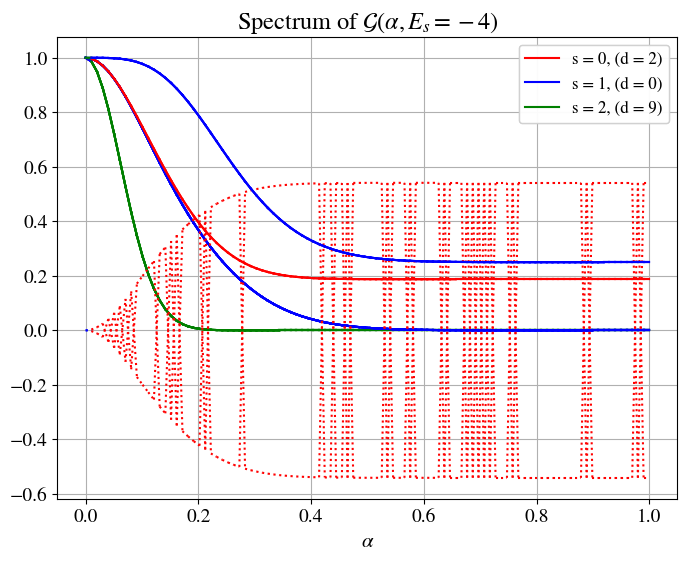

In [206]:
# def plot_spectra(VTA_type, log, N, Jx, Jy, Jz, periodic_bc, \
#                  α_start, α_end, α_steps, Es, \
#                  ranking, k_start, k_end, k_steps, asymptotes, \
#                  tolerance, current_directory, r = 1, Δ = 0, fontsize = 9, \
#                  ncol = 3, loc = 'right', loc_spin = None, \
#                  return_op_list = False, savefile = False): 

'''
plot analytic expression for VTA_exact or VTA 
as a function of α and Es
'''

# define λ
if Jx == Jy: 
    λ = Jz/Jx
else: 
    raise ValueError('Please enter valid Jx and Jy')

# compute array over which we will sweep α
α_array = np.linspace(α_start, α_end, α_steps)

# create list of eigenvalues to plot
k_list = list(range(k_start, k_end + 1, k_steps))


if ranking == 'spin' or Δ != 0: 

    # compute simulatenous eigenvectors H4, S2, Sz, and σ24
    H4, S2, Sz, σ24, P, eigvecs, ρ_list = symmetry_eigvecs(N, Jx, Jy, Jz, \
                                                       periodic_bc, return_operators = True)

    # transform S2, Sz, and σ24 into correct bases
    S2_P = S2.transform(P.dag()).tidyup(atol = tolerance)
    Sz_P = Sz.transform(P.dag()).tidyup(atol = tolerance)
    σ24_P = σ24.transform(P.dag()).tidyup(atol = tolerance)

    # construct perturbation 
    V = Δ*S2

else:
    P, eigvecs, ρ_list = symmetry_eigvecs(N, Jx, Jy, Jz, periodic_bc)

    V = 0

# initialize empty list in which to store spectra 
# and eigenvectors of for F (G) or log(F) (log(G))
op_list = []
spectra_list = []
eigvecs_list = []

if VTA_type == 'exact':

    if log == True: 

        # analytic expression for the coefficients of log(F(α; Es))
        f = lambda x, α: (-32*(α**2)*(x - 1 - Es/4)**2)

        # define title for graph
        title_str = fr'Spectrum of $\log(\mathcal{{F}}(\alpha, E_s = {format_number(Es)}))$'

        # define subfolder 
        sub_folder = 'log_F'

    elif log == False: 

        # analytic expression for the coefficients of F(α; Es)
        f = lambda x, α: np.exp(-32*(α**2)*(x - 1 - Es/4)**2)

        # define title for graph
        title_str = fr'Spectrum of $\mathcal{{F}}(\alpha, E_s = {format_number(Es)})$' 

        # define subfolder
        sub_folder = 'F'

    for α in α_array: 

        # generate array of coefficients to compute F(α; Es) or log(F(α; Es))
        coeff_array = [f(-1, α)] + [f(0, α)]*3 + \
                      [f(1, α)]*7 + [f(2, α)]*5

        # compute F(α; Es) or log(F(α; Es))
        F_op = (sum(f*ρ for f, ρ in zip(coeff_array, ρ_list)) + V)**r

        # transform F_op to P basis
        F_op_P = F_op.transform(P.dag()).tidyup(atol = tolerance)

        # append F_op to F_list
        op_list.append(F_op)

        # find the eigenvalues and eigenvectors of F_op
        F_op_P_eigvals, F_op_P_eigvecs = F_op_P.eigenstates()

        # compute spectrum of F_op
        F_op_P_eigvals_sorted = sort_eigvals(ranking, F_op_P_eigvals, k_start, k_end, k_steps)

        # append spectrum to list 
        spectra_list.append(F_op_P_eigvals_sorted)

        # append eigenvectors to list
        eigvecs_list.append(F_op_P_eigvecs)

elif VTA_type == 'approximate': 

    if log == True: 

        for α in α_array: 

            # compute coefficients of log(GL)
            log_GL = lambda α, Es: logm([[g00(α, Es), g04(α, Es)], [g40(α, Es), g44(α, Es)]])
            log_GL00 = lambda α, Es: log_GL(α, Es)[0, 0]
            log_GL01 = lambda α, Es: log_GL(α, Es)[0, 1]
            log_GL10 = lambda α, Es: log_GL(α, Es)[1, 0]
            log_GL11 = lambda α, Es: log_GL(α, Es)[1, 1]

            # compute operator that acts on logical subspace
            GL_op = lambda α, Es: log_GL00(α, Es)*ρ_list[0] + \
                                  log_GL01(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
                                  log_GL10(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
                                  log_GL11(α, Es)*ρ_list[4]

            # compute log(G)
            log_G = (GL_op(α, Es) + \
                    np.log(gt(α, Es))*sum(ρ_list[1:4]) + \
                    np.log(gs(α, Es))*sum(ρ_list[5:11]) + \
                    np.log(gq(α, Es))*sum(ρ_list[11:16]) + \
                    V)**r

            # convert log(G) to P basis
            log_G_P = log_G.transform(P.dag()).tidyup(atol = tolerance)

            # append log_G to op_list
            op_list.append(log_G_P)

            # find eigenvalues and eigenvectors of log(G)
            log_G_P_eigvals, log_G_P_eigvecs = log_G_P.eigenstates()

            # compute spectrum of log(G) 
            log_G_P_eigvals_sorted = sort_eigvals(ranking, log_G_P_eigvals, k_start, k_end, k_steps)

            # append spectrum to list 
            spectra_list.append(log_G_P_eigvals_sorted)

            # append eigenvectors to list
            eigvecs_list.append(log_G_P_eigvecs)

            # compute string for title of plot
            title_str = fr'Spectrum of $\log(\mathcal{{G}}(\alpha, E_s = {format_number(Es)}))$'

            # define subfolder
            sub_folder = 'log_G'

    if log == False: 

        for α in α_array: 

            # define operator that acts on the logical qubit subspace
            GL_op = lambda α, Es: g00(α, Es)*ρ_list[0] + \
                                  g04(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
                                  g40(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
                                  g44(α, Es)*ρ_list[4]

            # compute G
            G = (GL_op(α, Es) + \
                gt(α, Es)*sum(ρ_list[1:4]) + \
                gs(α, Es)*sum(ρ_list[5:11]) + \
                gq(α, Es)*sum(ρ_list[11:16]) + \
                V)**r

            # transform G to P basis
            G_P = G.transform(P.dag()).tidyup(atol = tolerance)

            # append G to op_list
            op_list.append(G_P)

            # find eigenvalues and eigenvectors of log(G)
            G_P_eigvals, G_P_eigvecs = G_P.eigenstates()

            # compute spectrum of log(G) 
            G_P_eigvals_sorted = sort_eigvals(ranking, G_P_eigvals, k_start, k_end, k_steps)

            # append spectrum to list 
            spectra_list.append(G_P_eigvals_sorted)

            # append eigenvectors to list
            eigvecs_list.append(G_P_eigvecs)

            # compute string for title of plot
            title_str = fr'Spectrum of $\mathcal{{G}}(\alpha, E_s = {format_number(Es)})$'

            # define subfolder 
            sub_folder = 'G'

else: 
    raise ValueError('Please enter a valid VTA_type and log type')


# convert list into array and create lists 
# of real and imaginary components
spectra_array = np.array(spectra_list)
spectra_array_real = spectra_array.real
spectra_array_imag = spectra_array.imag

# convert eigvecs list into array 
eigvecs_array = np.array(eigvecs_list)

# find lowest eigenvalue across all α for each eigenvalue 
# category, i.e., first largest, second largest, etc. 
asymptotes_list = []

for i in range(len(k_list)):
    asymptotes_list.append(spectra_array_real[:, i][-1])

# construct array of thresholds for plotting
asymptotes_array = np.tile(asymptotes_list, reps = α_steps).reshape(α_steps, len(k_list))

# modify title string if Δ is not equal to 0 
if Δ != 0: 
    title_str = title_str + fr' for $\Delta = {format_number(Δ)}$'

fig, ax = plt.subplots(figsize=(8, 6))

# customize features of graph if we desire to rank 
# eigenvalues according to energy or modulus 
if ranking == 'energy' or ranking == 'modulus': 

    # colors to use in plots
    colors = ['red', 'teal', 'purple', 'black', 'magenta', \
              'blue', 'orange', 'gray', 'cyan', 'coral', \
              'lightblue', 'silver', 'olive', 'pink', 'maroon', 'green']

    for i, j in enumerate(k_list):   

        # plots asymptotes
        if asymptotes and any(asymptotes_array[:, i] > tolerance): 
            ax.plot(α_array, asymptotes_array[:, i], \
                    color = colors[j], \
                    label = r'$\lim_{{\alpha \to \infty}}$ ' \
                    + fr'$\gamma_{{{j}}} = {asymptotes_array[0, i] : .3f}$', \
                    linestyle = ':')

        # check if there are nonnegligible imaginary parts
        if any(abs(spectra_array_imag[:, i]) > tolerance):

            # plots imaginary parts of spectrum
            ax.plot(α_array, spectra_array_imag[:, i], color = colors[j], \
                    label = f'$\mathcal{{Im}}(\gamma_{{{j}}})$', linestyle = '--')

            # plot real parts of spectrum
            ax.plot(α_array, spectra_array_real[:, i], color = colors[j], \
                    label = f'$\mathcal{{Re}}(\gamma_{{{j}}})$')

        # plots imaginary parts of spectrum
        elif all(abs(spectra_array_imag[:, i]) <= tolerance):
            # plot real parts of spectrum
            ax.plot(α_array, spectra_array_real[:, i], color = colors[j], \
                    label = f'$\gamma_{{{j}}}$')

        else: 
            raise ValueError('Further examine real and imaginary parts ' \
                             + f'of eigenvalue {j}')

    ax.legend(fontsize = fontsize, ncol = ncol, loc = loc)

# customize features of graph if we desire to rank 
# eigenvalues according to spin
elif ranking == 'spin': 

    # compute array of expectation values (<g_i|S^2|G_i>) for each α
    expectation_list = []
    for i in range(α_steps):

        # compute expectation of S^2 for each g_i
        expectation_list.append(expect(S2_P, eigvecs_array[i]))

    # compute s for every expectation value in expectation_list
    s_array = find_s(np.array(expectation_list))

    # define colors for plots
    color_map = {0: 'red', 1: 'blue', 2: 'green'}

    legend_elements = []

    if loc_spin != None: 

        # calculate eigenvalues of S^2
        s_eigvals = np.round(S2_P.diag(), 9)

        # convert to integers
        if np.all(s_eigvals - s_eigvals.astype(int)) < tolerance: 
            s_eigvals = s_eigvals.astype(int)
        else: 
            raise ValueError ('There is an eigenvalue that is not an integer')

        # collect data on angular momenta eigenvalues
        s_counts = Counter(s_eigvals)
        s_max = max(s_eigvals)

        # generates handles and labels for spin legend
        spin_handles = [plt.Line2D([0], [0], color = color) for color in color_map.values()]
        spin_labels = [f's = {i}, (d = {s_counts[i]})' for i in range(s_max + 1)]

        # find the coordinates of the top center of leg1
        spin_legend = ax.legend(spin_handles, spin_labels, \
                                fontsize = fontsize, loc = loc_spin)

        # Add the legend for all lines to the axes
        ax.add_artist(spin_legend)

    for i, j in enumerate(k_list):

        # check if there are nonnegligible imaginary parts
        if any(abs(spectra_array_imag[:, i]) > tolerance):

            for p in range(α_steps - 1):

                # plots imaginary parts of spectrum
                ax.plot(α_array[p:p+2], spectra_array_imag[:, i][p:p+2], \
                        color = color_map[s_array[:, j][p]], linestyle = ':')

                # plot real parts of spectrum
                ax.plot(α_array[p:p+2], spectra_array_real[:, i][p:p+2], \
                        color = color_map[s_array[:, j][p]])

        # plots  spectrum
        elif all(abs(spectra_array_imag[:, i]) < tolerance):

            for p in range(α_steps - 1):
                # plot real parts of spectrum
                ax.plot(α_array[p:p+2], spectra_array[:, i][p:p+2], \
                        color = color_map[s_array[:, j][p]])

        else: 
            raise ValueError('Further examine real and imaginary parts ' \
                             + f'of eigenvalue {j}')

ax.set_xlabel(r'$\alpha$', fontsize = 15)
ax.set_title(title_str, fontsize=17.5)
ax.grid(True)

if savefile: 

    # create name for png file 
    parent_dir = f'{current_directory}/data/λ={round(λ, 3)}/{sub_folder}/{ranking}'

    # Check if the directory already exists
    if not os.path.exists(parent_dir):
        # Create the directory
        os.makedirs(parent_dir)

    # save figure under custom filename
    filename = parent_dir + f'/Es={round(Es, 3)}_{k_start}_{k_end}_{k_steps}_{Δ}.png'
    plt.savefig(filename)

#     if return_op_list: 
#         return op_list

In [189]:
np.shape(spectra_array)

(100, 16)

In [192]:
spectra_array[3, :]

array([0.88910581+0.j        , 0.88910581+0.j        ,
       0.88910581+0.j        , 0.88910581+0.j        ,
       0.88910581+0.j        , 0.97125087+0.j        ,
       0.97125087+0.j        , 0.97125087+0.j        ,
       0.97125087+0.j        , 0.97125087+0.j        ,
       0.97125087+0.j        , 0.9713512 -0.02454349j,
       0.9713512 +0.02454349j, 0.99978729+0.j        ,
       0.99978729+0.j        , 0.99978729+0.j        ])

In [181]:
spectra_array_imag[:, 12]

array([ 0.        , -0.00281605,  0.01112826,  0.02454349,  0.04245311,
       -0.06409467,  0.08862385,  0.11518596,  0.14297759,  0.17129183,
        0.19954419,  0.22727992, -0.25416615,  0.27997401, -0.30455598,
       -0.32782317,  0.34972576,  0.37023832,  0.38935028, -0.40706093,
        0.42337777, -0.43831676,  0.45190341,  0.46417382,  0.47517513,
       -0.48496515,  0.49361132,  0.50118899, -0.50777933, -0.51346713,
       -0.51833857,  0.52247919, -0.5259721 , -0.52889658, -0.53132693,
        0.53333172,  0.53497335,  0.53630779, -0.53738467, -0.53824743,
       -0.53893368, -0.53947564,  0.5399006 , -0.54023147, -0.54048725,
       -0.5406836 , -0.54083327,  0.54094656, -0.54103171, -0.54109528,
       -0.5411424 ,  0.54117708,  0.54120244,  0.54122085,  0.54123413,
       -0.54124364, -0.5412504 , -0.54125517,  0.54125852,  0.54126086,
       -0.54126247, -0.54126359,  0.54126434, -0.54126486, -0.5412652 ,
        0.54126544, -0.54126559, -0.54126569,  0.54126576, -0.54

In [185]:
spectra_array[:, 12]

array([1.        +0.j        , 0.99674433-0.00281605j,
       0.98708761+0.01112826j, 0.9713512 +0.02454349j,
       0.95004042+0.04245311j, 0.92380399-0.06409467j,
       0.8933859 +0.08862385j, 0.8595762 +0.11518596j,
       0.8231664 +0.14297759j, 0.78491371+0.17129183j,
       0.74551627+0.19954419j, 0.70559911+0.22727992j,
       0.66570946-0.25416615j, 0.62631868+0.27997401j,
       0.58782795-0.30455598j, 0.55057532-0.32782317j,
       0.51484233+0.34972576j, 0.4808593 +0.37023832j,
       0.44880904+0.38935028j, 0.41882938-0.40706093j,
       0.39101494+0.42337777j, 0.36541899-0.43831676j,
       0.34205557+0.45190341j, 0.32090248+0.46417382j,
       0.30190494+0.47517513j, 0.28498007-0.48496515j,
       0.2700218 +0.49361132j, 0.25690604+0.50118899j,
       0.24549594-0.50777933j, 0.23564672-0.51346713j,
       0.22721027-0.51833857j, 0.22003905+0.52247919j,
       0.2139894 -0.5259721j , 0.20892417-0.52889658j,
       0.20471473-0.53132693j, 0.20124234+0.53333172j,
       0.1

In [196]:
G_list[]

[Quantum object: dims=[[2, 2, 2, 2], [2, 2, 2, 2]], shape=(16, 16), type='oper', dtype=Dense, isherm=True
 Qobj data =
 [[ 1.00000000e+00  3.38181128e-16  1.97073045e-16  1.76939766e-17
    5.78008803e-17  1.94071690e-16 -7.87063099e-17 -2.82968550e-17
    9.14162669e-18 -1.16154292e-16  1.60782987e-16  5.27502389e-17
    2.18589855e-16  1.37006103e-16  4.30644965e-17 -1.51964868e-16]
  [ 3.38181128e-16  1.00000000e+00 -1.38777878e-16 -1.10402709e-16
   -2.77555756e-17 -1.01942034e-16 -6.97189051e-17 -2.75825878e-17
   -8.32667268e-17 -1.25010553e-16 -2.01192549e-16 -1.10428114e-16
    1.29449489e-16 -8.16029983e-17  1.49557079e-17  1.26045913e-16]
  [ 1.97073045e-16 -1.38777878e-16  1.00000000e+00 -3.92806512e-16
    1.94289029e-16  1.71924301e-16  2.94397938e-17 -1.08180051e-17
   -2.22044605e-16  1.64162931e-16 -3.21778248e-16  2.06316054e-16
   -1.60320557e-16 -1.00674790e-16 -1.93538565e-16  4.16031430e-17]
  [ 1.76939766e-17 -1.10402709e-16 -3.92806512e-16  1.00000000e+00
   -3.7

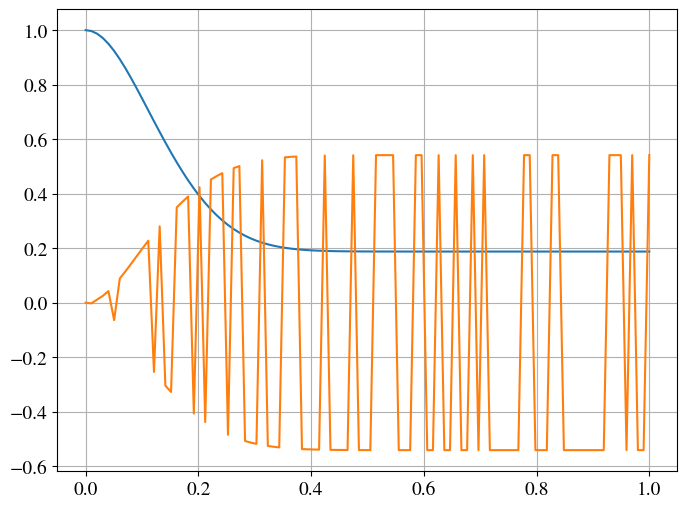

In [193]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(α_array, spectra_array_real[:, 12])
ax.plot(α_array, spectra_array_imag[:, 12])
ax.grid()

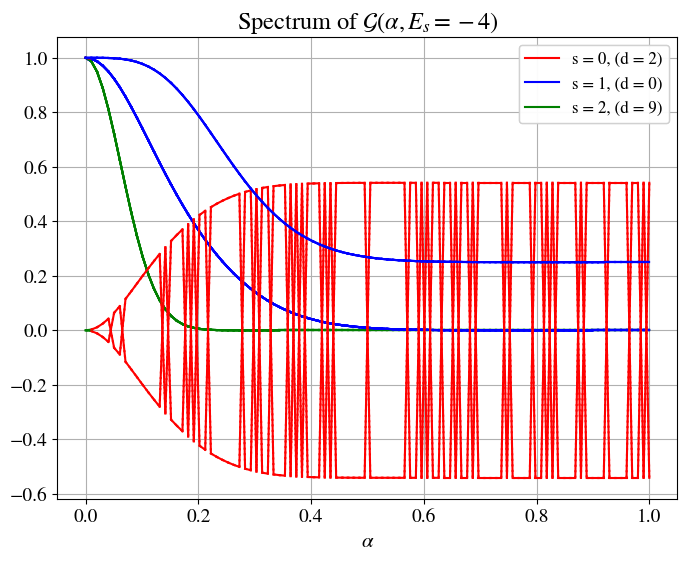

In [146]:
N = 4
VTA_type = 'approximate'
Es = -4
log = False

α_start = 0
α_end = 1
α_steps = 100

k_start = 0
k_end = 15
k_steps = 1
loc_spin = 'best'
return_op_list = False

plot_spectra(VTA_type, log, N, Jx, Jy, Jz, periodic_bc, \
                 α_start, α_end, α_steps, Es, \
                 ranking, k_start, k_end, k_steps, asymptotes, \
                 tolerance, current_directory, r = r, Δ = Δ, fontsize = fontsize, \
                 ncol = ncol, loc = 'right', loc_spin = loc_spin, \
                 return_op_list = return_op_list, savefile = False)

In [142]:
from scipy.linalg import logm

In [55]:
from qutip import sigmaz, sigmax, sigmay

In [100]:
# find function for BG 'bold G'
BG = lambda α, Es: Qobj([[g00(α, Es), g04(α, Es)], [g40(α, Es), g44(α, Es)]])

In [101]:
α = 1
Es = -8
BG(α, Es) 

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.50000000e-01  2.16506351e-01]
 [-2.16506351e-01  1.97877587e-15]]

In [102]:
λ = 1
σ_y = sigmay()
σ_z = sigmaz() 

In [103]:
λ = 1.5
M = σ_z + 1j*λ*σ_y
display(M)

M.eigenenergies()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[ 1.   1.5]
 [-1.5 -1. ]]

array([-3.53793654e-18-1.11803399j,  0.00000000e+00+1.11803399j])

In [73]:
Es_array = np.arange(-8, 1, 1)
Es_array

array([-8, -7, -6, -5, -4, -3, -2, -1,  0])

In [75]:
α = 0.5
BG_list = [BG(α, Es) for Es in Es_array]

In [104]:
BG_list[0]

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.50094349e-01  2.16342934e-01]
 [-2.16342934e-01  5.24160356e-05]]

In [107]:
A = lambda BG: abs((BG[0,0] - BG[1,1])/2)

In [109]:
B = lambda BG: abs((BG[0,1]))

In [116]:
A_list = []
B_list = []
for BG in BG_list:
    A_list.append(A(BG))
    B_list.append(B(BG))
    
A_array = np.array(A_list)
B_array = np.array(B_list)

In [120]:
A_array - B_array

array([ 0.15867803,  0.10214421,  0.00679931, -0.3217239 , -0.54112062,
       -0.3217239 ,  0.00679931,  0.10214421,  0.15867803])

# $\text{Modify function}$

In [ ]:
from spin_chain import symmetry_eigvecs
from matplotlib.lines import Line2D
from qutip import expect
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def F(α, Es):

    # define coefficient to be used in F(α, Es)
    f = lambda x, α: np.exp(-32*(α**2)*(x - 1 - Es/4)**2)

    # compute F(α, Es)
    return (f(-1, α)*ρ_list[0] + \
           f(0, α)*sum(ρ_list[1:4]) + \
           f(1, α)*sum(ρ_list[4:11]) + \
           f(2, α)*sum(ρ_list[11:16])).tidyup()

In [ ]:
def find_s(γ, tolerance = 1e-9):
    
    '''
    function that will find s eigval from 
    total angular momentum eigenvalue γ = s(s+1)
    '''
    # compute s and round to nearest integer
    s = (-1 + np.sqrt(1 + 4*γ))/2
    int_s = np.round(s, decimals = abs(np.log10(tolerance)).astype(int))
    
    # return s if its is sufficiently close to an integer
    if np.all(abs(s - int_s)) < tolerance: 
        return int_s
    else: 
        raise ValueError('s is not an integer')

In [41]:
# G(α, Es) basis functions
e0 = lambda α, Es: np.exp(-2*(α**2)*((Es + 12)**2)) 
e1 = lambda α, Es: np.exp(-2*(α**2)*((Es + 8)**2)) 
e2 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2)) 
e3 = lambda α, Es: np.exp(-2*(α**2)*(Es**2)) 
e4 = lambda α, Es: np.exp(-2*(α**2)*((Es - 4)**2))
e5 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 4))
e6 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 20))
e7 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 8))
e8 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 16))
e9 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 16))
e10= lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 32))

# G(α, Es) coefficients
g00 = lambda α, Es: (3*e0(α, Es) + 24*e1(α, Es) \
                     + 6*e2(α, Es) - e4(α, Es))/32
g44 = lambda α, Es: -(e0(α, Es) - 6*e2(α, Es) \
                      - 24*e3(α, Es) - 3*e4(α, Es))/32
g04 = lambda α, Es: (np.sqrt(3)*(e0(α, Es) + 4*e1(α, Es) - \
                     10*e2(α, Es) + 4*e3(α, Es) + e4(α, Es)))/32
g40 = lambda α, Es: - g04(α, Es)
gt = lambda α, Es: (e10(α, Es) + e2(α, Es) + 4*e5(α, Es) - 4*e6(α, Es) + \
                    2*e8(α, Es))/4
gs = lambda α, Es: (e3(α, Es) + e5(α, Es) - e6(α, Es) + e9(α, Es))/2
gq = lambda α, Es: e4(α, Es)

In [ ]:
def sort_eigvals(ranking, eigvals, k_start, k_end, k_steps): 
    
    '''
    returns eigenvalues depending on method of ranking
    '''
    
    if ranking == 'energy' or ranking == 'spin': 
        
        return eigvals
    
    elif ranking == 'modulus': 
        
        # define key that sorts according to modulus 
        key = lambda x: abs(x)
        
        return np.array(sorted(eigvals, reverse = True, key=key) \
                        [k_start:k_end + 1: k_steps])

In [ ]:
N = N_qubits
Es = -8
ranking = 'spin'
loc_spin = 'right'
k_start = 0
k_end = 15
k_steps = 1

In [ ]:
N = 4
Es = 0
log = True

α_start = 0
α_end = 1
α_steps = 1000

k_start = 0
k_end = 15
k_steps = 1
loc_spin = 'best'
plot_spectra(VTA_type, log, N, Jx, Jy, Jz, periodic_bc, \
                 α_start, α_end, α_steps, Es, \
                 ranking, k_start, k_end, k_steps, asymptotes, \
                 tolerance, current_directory, r = r, Δ = Δ, fontsize = fontsize, \
                 ncol = ncol, loc = 'right', loc_spin = loc_spin, \
                 return_op_list = return_op_list, savefile = False)

# $\text{Level Crossing}$

In [ ]:
# import relevant quantities from QuTiP
from qutip import sigmax, sigmay, sigmaz, Qobj, expect
σ_x = sigmax()
σ_y = sigmay()
σ_z = sigmaz()

In [ ]:
# find simultaneous eigenvectors of H4, S^2, Sz, and σ24
H4, S2, Sz, σ24, P, eigvecs, ρ_list = \
spin_chain.symmetry_eigvecs(N_qubits, Jx, Jy, Jz, periodic_bc, return_operators = True)

# find σ24 logical block in the P basis and verify it equals σ_z
σ24_P = σ24.transform(P.dag()).tidyup()
σ24_P_B = Qobj([[σ24_P[0, 0], σ24_P[0, 4]], [σ24_P[4, 0], σ24_P[4, 4]]])
σ24_P_B == σ_z

In [42]:
# find function for BG 'bold G'
BG = lambda α, Es: Qobj([[g00(α, Es), g04(α, Es)], [g40(α, Es), g44(α, Es)]])

# define column vectors of BG
cvec0 = lambda α, Es: Qobj([[g00(α, Es)], [g04(α, Es)]])
cvec1 = lambda α, Es: Qobj([[g40(α, Es)], [g44(α, Es)]])

In [ ]:
BG(α_optimal, -8)

In [ ]:
α_start = 0
α_end = 1
α_steps = 1001

# define array over which we will sweep α
α_array = np.linspace(α_start, α_end, α_steps)
cvec0_array = [expect(σ_z, cvec0(α, Es)) for α in α_array]
cvec1_array = [expect(σ_z, cvec1(α, Es)) for α in α_array]

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(α_array, cvec0_array, color = 'red', \
        label = r'$\langle E_0 | \sigma_{24} |E_0 \rangle$')
ax.plot(α_array, cvec1_array, color = 'blue', \
        label = r'$\langle E_4 | \sigma_{24} |E_4 \rangle$')
ax.set_xlabel(r'$\alpha$', fontsize = 15)
ax.set_title(fr'$\langle \sigma_{{24}} \rangle$ using columns of $\bf{{G}}$ for $E_s = {Es}$', fontsize=17.5)
ax.legend()
ax.grid()

# $\text{Analysis of } \bf{G}$

In [ ]:
# G(α, Es) basis functions
e0 = lambda α, Es: np.exp(-2*(α**2)*((Es + 12)**2)) 
e1 = lambda α, Es: np.exp(-2*(α**2)*((Es + 8)**2)) 
e2 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2)) 
e3 = lambda α, Es: np.exp(-2*(α**2)*(Es**2)) 
e4 = lambda α, Es: np.exp(-2*(α**2)*((Es - 4)**2))
e5 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 4))
e6 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 20))
e7 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 8))
e8 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 16))
e9 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 16))
e10= lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 32))

# G(α, Es) coefficients
g00 = lambda α, Es: (3*e0(α, Es) + 24*e1(α, Es) \
                     + 6*e2(α, Es) - e4(α, Es))/32
g44 = lambda α, Es: -(e0(α, Es) - 6*e2(α, Es) \
                      - 24*e3(α, Es) - 3*e4(α, Es))/32
g04 = lambda α, Es: (np.sqrt(3)*(e0(α, Es) + 4*e1(α, Es) - \
                     10*e2(α, Es) + 4*e3(α, Es) + e4(α, Es)))/32
g40 = lambda α, Es: - g04(α, Es)
gt = lambda α, Es: (e10(α, Es) + e2(α, Es) + 4*e5(α, Es) - 4*e6(α, Es) + \
                    2*e8(α, Es))/4
gs = lambda α, Es: (e3(α, Es) + e5(α, Es) - e6(α, Es) + e9(α, Es))/2
gq = lambda α, Es: e4(α, Es)

# compute G
def G(α, Es): 
    
    return g00(α, Es)*ρ_list[0] + \
           g04(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
           g40(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
           g44(α, Es)*ρ_list[4] + \
           gt(α, Es)*sum(ρ_list[1:4]) + \
           gs(α, Es)*sum(ρ_list[5:11]) + \
           gq(α, Es)*sum(ρ_list[11:16])
def find_arg(α_array, g_array):
    
    # find list of indices that rank order
    # moduli of terms in g_array
    arg_g_array = np.argsort(abs(g_array))
    
    # check for the first number that is larger 
    # than the number that follows
    for i in range(len(arg_g_array)): 
        if arg_g_array[i] > arg_g_array[i+1]: 
            
            optimal_indx = arg_g_array[i]
            # return α_array that minimizes
            # abs_g_array
            return α_array[optimal_indx]
def analyze_BG(α_start, α_end, α_steps, Es, asymptotes = False, \
               fontsize = 9, ncol = 2, loc = 'best'): 

    # construct arrays of the evolution of the entries of 
    # G over a sweep of α
    α_array = np.linspace(α_start, α_end, α_steps)
    g00_array = np.array([g00(α, Es) for α in α_array])
    g04_array = np.array([g04(α, Es) for α in α_array])
    g40_array = np.array([g40(α, Es) for α in α_array])
    g44_array = np.array([g44(α, Es) for α in α_array])

    # compute arrays of asymptotes
    g00_lim = g00_array[-1]
    g04_lim = g04_array[-1]
    g40_lim = g40_array[-1]
    g44_lim = g44_array[-1]

    # find the asymptotes of each entry
    g00_asym_array = np.tile(g00_lim, reps = α_steps)
    g04_asym_array = np.tile(g04_lim, reps = α_steps)
    g40_asym_array = np.tile(g40_lim, reps = α_steps)
    g44_asym_array = np.tile(g44_lim, reps = α_steps)
    
    # compute labels of g00 and g44
    g00_label = fr'$ \lim_{{\alpha \to \infty}} g_{{00}} = {round(g00_lim, 3)}$'
    g44_label = fr'$ \lim_{{\alpha \to \infty}} g_{{44}} = {round(g44_lim, 3)}$'

    # compute labels of g04 and g40
    if np.allclose(g04_lim, np.sqrt(3)/8, atol = 1e-9):
        g04_label = r'$\lim_{{\alpha \to \infty}} g_{{00}} = \frac{\sqrt{3}}{8}$'
    else: 
        g04_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g04_lim, 3)}$'

    if np.allclose(g40_lim, -np.sqrt(3)/8, atol = 1e-9):
        g40_label = r'$\lim_{{\alpha \to \infty}} g_{{40}} = -\frac{\sqrt{3}}{8}$'
    else: 
        g40_label = fr'$\lim_{{\alpha \to \infty}} g_{{00}} = {round(g40_lim, 3)}$'
        
    # find α that minimzes abs(g04_array)
    α_optimal = find_arg(α_array, g04_array)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(α_array, g00_array, color = 'green', label = r'$g_{00}$')
    ax.plot(α_array, g04_array, color = 'red', label = r'$ g_{04}$')
    ax.plot(α_array, g40_array, color = 'orange', label = r'$g_{40}$')
    ax.plot(α_array, g44_array, color = 'blue', label = r'$g_{44}$')
    
    if asymptotes: 
        
        # compute labels of g00, g04 and g40
        if np.allclose(g00_lim, 3/4, atol = 1e-9):
            g00_label = r'$\lim_{{\alpha \to \infty}} g_{{00}} = \frac{3}{4}$'
        else: 
            g00_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g00_lim, 3)}$'
        
        if np.allclose(g04_lim, np.sqrt(3)/8, atol = 1e-9):
            g04_label = r'$\lim_{{\alpha \to \infty}} g_{{04}} = \frac{\sqrt{3}}{8}$'
        else: 
            g04_label = fr'$\lim_{{\alpha \to \infty}} g_{{04}} = {round(g04_lim, 3)}$'

        if np.allclose(g40_lim, -np.sqrt(3)/8, atol = 1e-9):
            g40_label = r'$\lim_{{\alpha \to \infty}} g_{{40}} = -\frac{\sqrt{3}}{8}$'
        else: 
            g40_label = fr'$\lim_{{\alpha \to \infty}} g_{{40}} = {round(g40_lim, 3)}$'
    
        ax.plot(α_array, g00_asym_array, color = 'green', \
                linestyle = '--', label = g00_label)

        ax.plot(α_array, g04_asym_array, color = 'red', \
                linestyle = '--', label = g04_label)

        ax.plot(α_array, g40_asym_array, color = 'orange', \
                linestyle = '--', label = g40_label)

        ax.plot(α_array, g44_asym_array, color = 'blue', \
                linestyle = '--', label = g44_label)

    ax.set_xlabel(r'$\alpha$', fontsize = 15)
    ax.set_title(fr'Entries of $\bf{{G}}$ for $E_s = {Es}$', fontsize=17.5)
    ax.legend(fontsize = fontsize, ncol = ncol, loc = loc)
    ax.grid()
    
    # find α that minimzes abs(g04_array)
    α_optimal = find_arg(α_array, g04_array)
    return α_optimal   

In [ ]:
α_start = 0
α_end = 1
α_steps = 10001
Es = -8
asymptotes = True
fontsize = 11
ncol = 2
loc = (0.55, 0.42)
α_optimal = analyze_BG(α_start, α_end, α_steps, Es,\
                       asymptotes = asymptotes, \
                       fontsize = fontsize,  \
                       ncol = ncol, loc = loc)

plt.savefig('graph_BG_full')

In [ ]:
def diagonalize_BG(α, Es, vec): 
    
    # diagonalize BG(α, Es)
    (u_eigval, v_eigval), (u,v) = BG(α, Es).eigenstates()

    # normalize u and v
    u = u.unit()
    v = v.unit()

    # verify that these are right eigvectors of BG(α, Es)
    bool1 = BG(α, Es)*u == u_eigval*u
    bool2 = BG(α, Es)*v == v_eigval*v
    
    if bool1 & bool2: 
        
        if vec == 'u':
            return expect(σ_z, u)
        elif vec == 'v': 
            return expect(σ_z, v)

α_start = 0
α_end = 1
α_steps = 1001
α_array = np.linspace(α_start, α_end, α_steps)        
u_expectation = [diagonalize_BG(α, Es, 'u') for α in α_array]
v_expectation = [diagonalize_BG(α, Es, 'v') for α in α_array]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(α_array, u_expectation, color = 'red', \
        label = r'$\langle u | \sigma_{24} | u \rangle$')
ax.plot(α_array, v_expectation, color = 'blue', \
        label = r'$\langle v | \sigma_{24} | v \rangle$')
ax.set_xlabel(r'$\alpha$', fontsize = 15)
ax.set_title(fr'$\langle \sigma_{{24}} \rangle$ using right eigenvectors of $\bf{{G}}$ when $E_s = {Es}$', fontsize=17.5)
ax.legend()
ax.grid()

In [ ]:
BG(0.1, -8)

In [ ]:
α_optimal 

In [ ]:
G_P(0.1546, -8)

# $\text{Analyze Spectra of } \mathcal{G}(\alpha, E_s) $

In [ ]:
σ24_P_B == sigmaz()

In [ ]:
from tabulate import tabulate

In [ ]:
α = 0.1 
Es = -8
G(α, Es).transform(P.dag()).tidyup()

In [ ]:
H4_list = (H4.transform(P.dag()).tidyup()).diag()
S2_list = (S2.transform(P.dag()).tidyup()).diag()
σ24_list = (σ24.transform(P.dag()).tidyup()).diag()
Sz_list = (Sz.transform(P.dag()).tidyup()).diag()

In [ ]:
# Create the table
table = [["n", 'H4 eigenvalues', "S^2 eigenvalues", "Sz eigenvalues", "σ24 eigenvalues"]]
for i in range(len(n_values)):
    table.append([n_values[i], H4_list[i], S2_list[i], Sz_list[i], σ24_list[i]])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))

In [ ]:

table = [["n", 'H4 eigenvalues', "S^2 eigenvalues", "Sz eigenvalues", "σ24 eigenvalues"]]
for n in [0, 4]:
    table.append([n_values[n], H4_list[n], S2_list[n], Sz_list[n], σ24_list[n]])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))

# $\mathcal{G}(\alpha, Es)$

In [ ]:
# G(α, Es) basis functions
e0 = lambda α, Es: np.exp(-2*(α**2)*((Es + 12)**2)) 
e1 = lambda α, Es: np.exp(-2*(α**2)*((Es + 8)**2)) 
e2 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2)) 
e3 = lambda α, Es: np.exp(-2*(α**2)*(Es**2)) 
e4 = lambda α, Es: np.exp(-2*(α**2)*((Es - 4)**2))
e5 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 4))
e6 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 20))
e7 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 8))
e8 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 16))
e9 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 16))
e10= lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 32))

# G(α, Es) coefficients
g00 = lambda α, Es: (3*e0(α, Es) + 24*e1(α, Es) \
                     + 6*e2(α, Es) - e4(α, Es))/32
g44 = lambda α, Es: -(e0(α, Es) - 6*e2(α, Es) \
                      - 24*e3(α, Es) - 3*e4(α, Es))/32
g04 = lambda α, Es: (np.sqrt(3)*(e0(α, Es) + 4*e1(α, Es) - \
                     10*e2(α, Es) + 4*e3(α, Es) + e4(α, Es)))/32
g40 = lambda α, Es: - g04(α, Es)
gt = lambda α, Es: (e10(α, Es) + e2(α, Es) + 4*e5(α, Es) - 4*e6(α, Es) + \
                    2*e8(α, Es))/4
gs = lambda α, Es: (e3(α, Es) + e5(α, Es) - e6(α, Es) + e9(α, Es))/2
gq = lambda α, Es: e4(α, Es)

# compute G
def G(α, Es): 
    
    return g00(α, Es)*ρ_list[0] + \
           g04(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
           g40(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
           g44(α, Es)*ρ_list[4] + \
           gt(α, Es)*sum(ρ_list[1:4]) + \
           gs(α, Es)*sum(ρ_list[5:11]) + \
           gq(α, Es)*sum(ρ_list[11:16])

def gs_fidelity(α, Es): 

    # calculate bold G (BG) which are the coefficients acting
    # on the logical subspace spanned by |E0><E0| and |E4><E4|
    BG = extract_block(G(α, Es).transform(P.dag()).tidyup())
    
    # find effective ground state of BG
    gs_eff = Qobj(BG[0])
    
    # contruct true ground state 
    gs = basis(2, 0)
    
    fid = fidelity(gs_eff, gs)**2
        
    # compute fidelity with true ground state
    return fid

In [1]:
# parameters for α_array 
α_start = 0 
α_end = 1
α_steps = 101

# parameters for α_array 
Es_start = -8
Es_end = 0
Es_gradation = 0.1

# construct α_array and Es_array
α_array = np.linspace(α_start, α_end, α_steps)
Es_array = np.arange(Es_start, Es_end + Es_gradation, Es_gradation)

α_grid, Es_grid, = np.meshgrid(α_array, Es_array)

# Initialize an array to store fidelity values
fid_values = np.zeros((len(α_array), len(Es_array)))

for i, α in enumerate(α_array):
    for j, Es in enumerate(Es_array):
        fid_values[i,j] = gs_fidelity(α, Es)

NameError: name 'np' is not defined

In [2]:
plt.imshow(fid_values, extent = [0, 1, -8, 0], cmap='viridis', origin='lower')
plt.colorbar(label='Fidelity')
plt.xlabel('α')
plt.ylabel('Es')
plt.title('Heatmap of gs_fidelity(α, Es)')
plt.show()

NameError: name 'plt' is not defined

$$ \Huge \tilde{H}_4 = H_4 + \Delta \bf{S} \cdot \bf{S}$$

In [ ]:
def extract_block(M):
    
    '''
    extracts block corresponding to the the matrix elements 
    <E0|M|E0>, <E0|M|E4>, <E4|M|E0>, <E4|M|E4>
    '''
    
    # extract entries
    M00 = M[0, 0]
    M04 = M[0, 4]
    M40 = M[4, 0]
    M44 = M[4, 4]
    

    # construct matrix 
    B = Qobj([[M00, M04], [M40, M44]])
    
    return B

In [ ]:
α_array = np.linspace(α_start, α_end, α_steps)

In [ ]:
# VTA_list is a list of VTAs for a 100-point 
# sweep over α from 0 to 1
A = (G_list[1].transform(P.dag())).tidyup()
A

In [ ]:
# construct true groundstate and initialize list for BG
gs = basis(2, 0)
BG_list = []
fidelity_list = []

for G in G_list:
    
    # calculate bold G (BG) which are the coefficients acting
    # on the logical subspace spanned by |E0><E0| and |E4><E4|
    BG = extract_block(G.transform(P.dag()).tidyup())
    
    # append BG to list 
    BG_list.append(BG)
    
    # find effective ground state of BG
    gs_eff = Qobj(BG[0])
        
    # construct true ground state 
    fidelity_list.append(fidelity(gs_eff, gs)**2)
    


In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(α_array, fidelity_list)

In [ ]:
BG = BG_list[3]
λBG, eigvecBG = BG.eigenstates()
display(BG*eigvecBG[0] == λBG[0]*eigvecBG[0])
display(BG*eigvecBG[1] == λBG[1]*eigvecBG[1])

In [ ]:
B = extract_block(A)

λB, eigvecB = B.eigenstates()

display(B*eigvecB[0] == λB[0]*eigvecB[0])
display(B*eigvecB[1] == λB[1]*eigvecB[1])

In [ ]:
B[0]

In [ ]:
fidelity_array = []

for i, VTA in enumerate(VTA_list): 
    
    print(i)
    # extract 2x2 block from VTA
    B = extract_block(VTA)
    
    # extract normalized effective ground state
    gs_eff = Qobj(B[0]).unit()
    
    # calculate fidelity with true ground state
    gs = basis(2, 0)
    fid = fidelity(gs, gs_eff)**2
    
    fidelity_array.append(fid)
    
    

In [ ]:
VTA_list[1]

# $\text{Characterize Angular Momenta}$

In [ ]:
from scipy.linalg import null_space, logm
from numpy.linalg import matrix_rank, svd
from sympy import Matrix
from functools import reduce
from collections import Counter
from qutip import sigmax, sigmay, sigmaz, qeye, commutator, \
                  tensor, qdiags, Qobj, simdiag, qzero, fidelity, basis
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

In [ ]:
def verify_diagonal(M):
     
    '''
    verifies whether a matrix is diagonal
    '''
        
    return M == qdiags(M.diag(), 0, dims = M.dims)
def find_s(γ, tolerance):
    
    '''
    function that will find s eigval from 
    total angular momentum eigenvalue γ = s(s+1)
    '''
    # compute s and round to nearest integer
    s = (-1 + np.sqrt(1 + 4*γ))/2
    int_s = round(s)
    
    # return s if its is sufficiently close to an integer
    if abs(s - int_s) < tolerance: 
        return int_s
    else: 
        raise ValueError('s is not an integer')

In [ ]:
N = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
return_operators = True
H4, S2, Sz, σ24, P, eigvecs, ρ_list = \
spin_chain.symmetry_eigvecs(N, Jx, Jy, Jz, periodic_bc, return_operators)

In [ ]:
# find particular value of F
#F10 = F_list[10]

# verify that H4, S^2, Sz, and σ24 
# can be diagonalized in the P basis
H4_P = (H4.transform(P.dag())).tidyup(atol = 1e-14)
S2_P = (S2.transform(P.dag())).tidyup(atol = 1e-14)
Sz_P = (Sz.transform(P.dag())).tidyup(atol = 1e-14)
σ24_P = (σ24.transform(P.dag())).tidyup(atol = 1e-14)
#F10_P = F10.transform(P.dag())

display(verify_diagonal(H4_P))
display(verify_diagonal(S2_P))
display(verify_diagonal(Sz_P))
display(verify_diagonal(σ24_P))
#display(verify_diagonal(F10_P))

In [ ]:
Δ = 2
commutator(H4 + Δ*S2, H4).norm()